In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,2,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,2,1,Cumings Mrs John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,2,1,Futrelle Mrs Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2
4,5,1,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,Montvila Rev Juozas,male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,Graham Miss Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,4,3,"Johnston Miss Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,Behr Mr Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
#checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
#Checking for null
df.isnull().sum()[df.isnull().sum()>0]

,0
Age,177
Cabin,687
Embarked,2


In [ ]:
#Treating null values (age)
median1 = df['Age'].median()
df['Age'].fillna(median1, inplace=True)

/tmp/ipython-input-2644269496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median1, inplace=True)


In [ ]:
#Treating null values (Embarked, Cabin)
df.fillna('')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,2,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,,S,2
1,2,2,1,Cumings Mrs John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,,S,1
3,4,2,1,Futrelle Mrs Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2
4,5,1,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,Montvila Rev Juozas,male,27.0,0,0,211536,13.0000,,S,1
887,888,1,1,Graham Miss Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,4,3,"Johnston Miss Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,,S,4
889,890,1,1,Behr Mr Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
#Removing commas from name column
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[.,]', '', x).strip())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,2,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,2,1,Cumings Mrs John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,2,1,Futrelle Mrs Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2
4,5,1,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,Montvila Rev Juozas,male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,Graham Miss Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,4,3,"Johnston Miss Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,Behr Mr Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,1


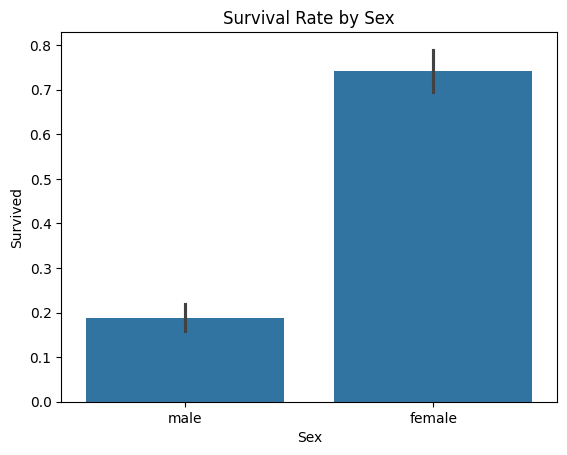

In [ ]:
# Relationship between Survived and Sex
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

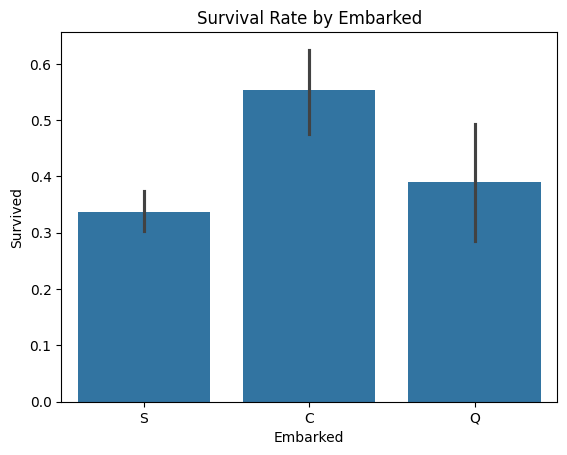

In [ ]:
# Relationship between Survived and Embarked
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked')
plt.show()

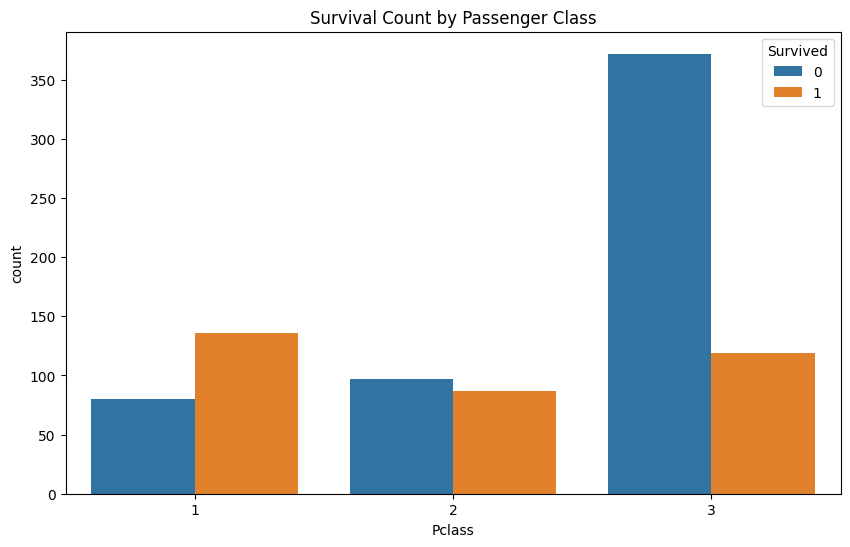

In [ ]:
#Count of survival based on passenger class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

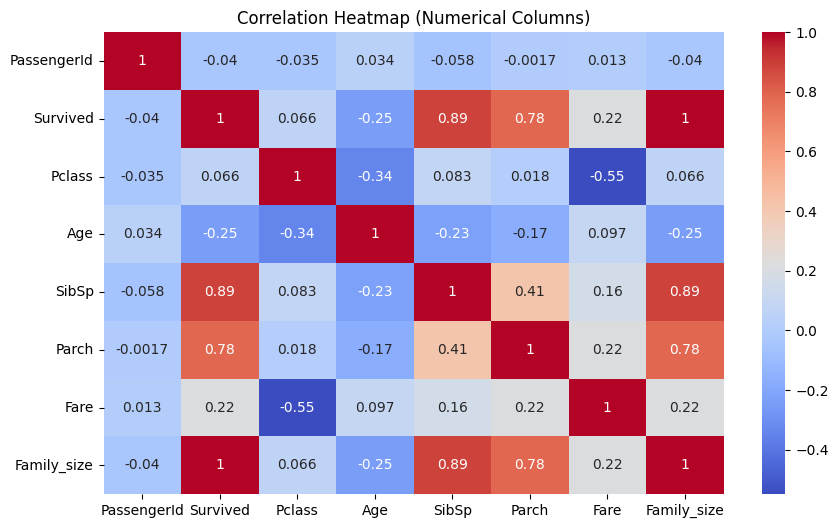

In [ ]:
#Correlation heatmap only on numerical values
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

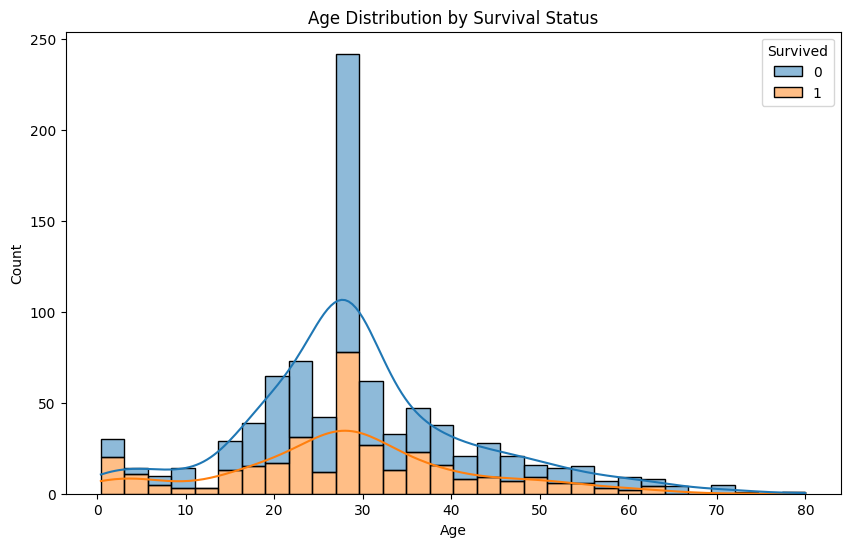

In [ ]:
#Survival statues based on the age using histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple="stack")
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

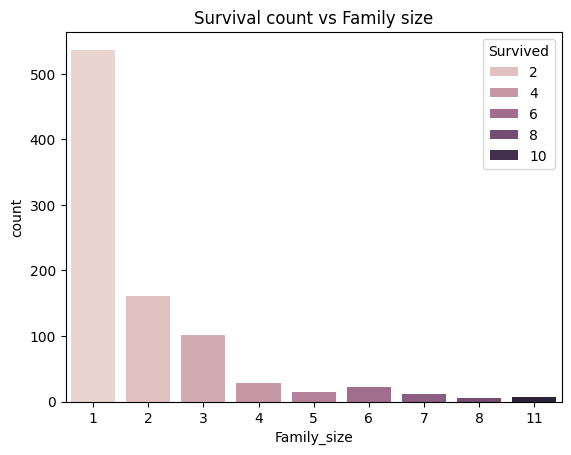

In [ ]:
#Count of survived based on Family size
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
sns.countplot( data= df , x= 'Family_size', hue= 'Survived')
plt.title('Survival count vs Family size')
plt.show()